In [1]:
print("python")

python


In [2]:
!python --version

Python 3.12.1


In [3]:
import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("shape of train dataset : " , train_df.shape)
print("shape of test dataset : " , test_df.shape)

shape of train dataset :  (1460, 81)
shape of test dataset :  (1459, 80)


In [5]:
train_df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train_df['Id'].describe()

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

In [9]:
# deleting the 'Id' feature because it has serial number only, but this Id is needed at the time of creation of submission file
train_df.drop(columns='Id', inplace=True)
test_df.drop(columns='Id', inplace=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
# separating the dataset
x = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

In [12]:
numeric_features = x.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x.select_dtypes(include=["object"]).columns

print("Numerical:", len(numeric_features))
print("Categorical:", len(categorical_features))

Numerical: 36
Categorical: 43


In [13]:
train_df[numeric_features].median()

MSSubClass         50.0
LotFrontage        69.0
LotArea          9478.5
OverallQual         6.0
OverallCond         5.0
YearBuilt        1973.0
YearRemodAdd     1994.0
MasVnrArea          0.0
BsmtFinSF1        383.5
BsmtFinSF2          0.0
BsmtUnfSF         477.5
TotalBsmtSF       991.5
1stFlrSF         1087.0
2ndFlrSF            0.0
LowQualFinSF        0.0
GrLivArea        1464.0
BsmtFullBath        0.0
BsmtHalfBath        0.0
FullBath            2.0
HalfBath            0.0
BedroomAbvGr        3.0
KitchenAbvGr        1.0
TotRmsAbvGrd        6.0
Fireplaces          1.0
GarageYrBlt      1980.0
GarageCars          2.0
GarageArea        480.0
WoodDeckSF          0.0
OpenPorchSF        25.0
EnclosedPorch       0.0
3SsnPorch           0.0
ScreenPorch         0.0
PoolArea            0.0
MiscVal             0.0
MoSold              6.0
YrSold           2008.0
dtype: float64

In [14]:
train_df[numeric_features].isna().sum() [train_df[numeric_features].isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [15]:
train_df[numeric_features].describe()[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


mean will be shifted for the LotFrontage and MasVnrArea features that why we'll use Median and for GarageYrBlt mean or median both will be good

In [16]:
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())
train_df[numeric_features].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [17]:
# print(train_df[categorical_features].isna().sum() [train_df[categorical_features].isna().sum() > 0])

# # droping the freatures that have missing values more then 80%
# cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

# train_df.drop(columns=cols_to_drop, inplace=True)

# # updating the categorical features by remove the droped column names
# categorical_features = list(set(categorical_features) - (set(cols_to_drop)))

# # rest features we filled with mode
# remaining_cat_cols = [
#     'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
#     'BsmtFinType1', 'BsmtFinType2', 'Electrical',
#     'FireplaceQu', 'GarageType', 'GarageFinish',
#     'GarageQual', 'GarageCond'
# ]

# for col in remaining_cat_cols:
#     train_df[col].fillna(train_df[col].mode()[0], inplace=True)

In [18]:
train_df[categorical_features].isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [19]:
# no missing values
train_df.isna().sum() [train_df.isna().sum() > 0]

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [20]:
train_df['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [21]:
train_df['Fence'].isna().sum()

1179

In [22]:
# testing for the replacement of values with numbers
mapping = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, np.nan:0}
train_df['Fence'].map(mapping).isna().sum()

0

In [23]:
# filling this categorical features with specific values because missing values has there own important meaning (i know this because it is already present in the 'data_description.txt' file)

train_df['Alley'] = train_df['Alley'].fillna('No_alley_access')
train_df['GarageType'] = train_df['GarageType'].fillna('No_Garage')
train_df['MiscFeature'] = train_df['MiscFeature'].fillna('None')

In [24]:
# performing ordinal encoding and keep the importantance of missing values 
ordinal_mappings = {

    'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'BsmtQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},
    'BsmtCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'BsmtExposure': {'Gd':4, 'Av':3, 'Mn':2, 'No':1, np.nan:0},

    'BsmtFinType1': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0},
    'BsmtFinType2': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0},

    'HeatingQC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},

    'FireplaceQu': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'GarageFinish': {'Fin':4, 'RFn':3, 'Unf':2, np.nan:1},
    'GarageQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},
    'GarageCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0},

    'PavedDrive': {'Y':3, 'P':2, 'N':1},

    'PoolQC': {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, np.nan:0},

    'Fence': {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, np.nan:0}
}

# final replacement
for col, mapping in ordinal_mappings.items():
    if col in train_df.columns:
        train_df[col] = train_df[col].map(mapping)

In [25]:
train_df[categorical_features].isna().sum() [ train_df[categorical_features].isna().sum() > 0]

MasVnrType    872
Electrical      1
dtype: int64

In [26]:
train_df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [27]:
# because the hint is available in the 'data_description.txt' file 
train_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")

In [28]:
train_df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [29]:
# here i am filling the mode because only record is missing so it doesnot affect the distribution of the data
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [30]:
train_df.isna().sum() [ train_df.isna().sum() > 0]

Series([], dtype: int64)

# visualization

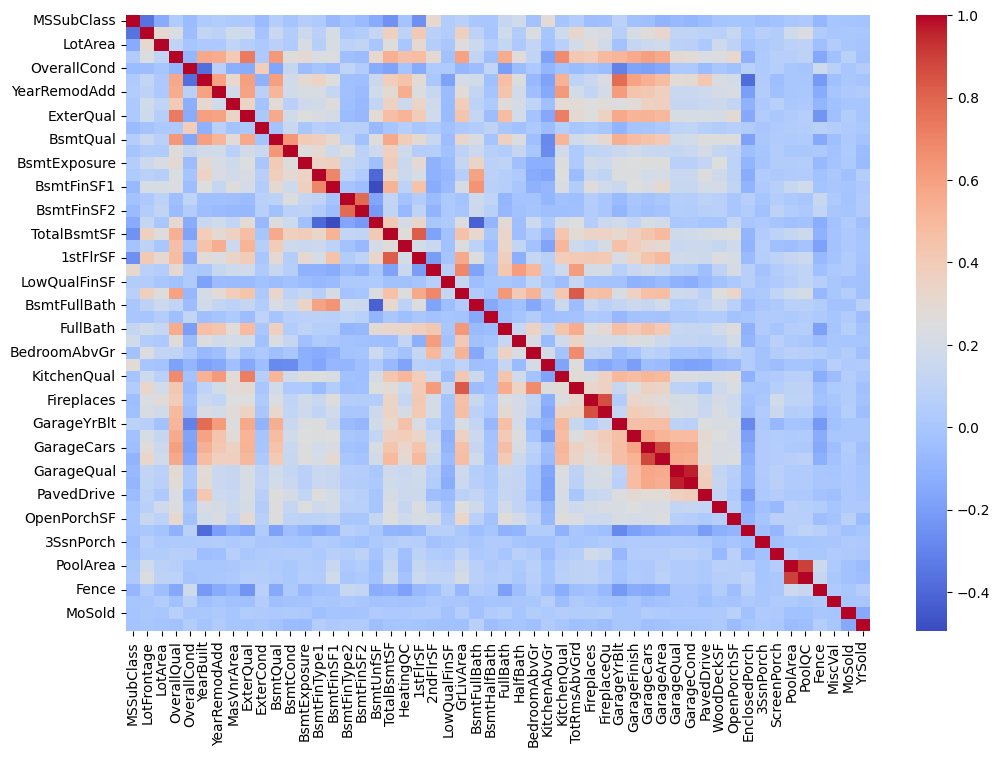

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_df[numeric_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [86]:
import numpy as np

condition_number = np.linalg.cond(train_df[numeric_features])
condition_number

5.322280266897778e+16

In [ ]:
import numpy as np

condition_number = np.linalg.cond(train_df[numeric_features])
condition_number # output = 5.322280266897778e+16

# encoding

In [31]:
# again doing this because we have applied ordinal encoding by replace the category with numbers

# separating the dataset
x = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

numeric_features = x.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x.select_dtypes(include=["object"]).columns

print("Numerical:", len(numeric_features))
print("Categorical:", len(categorical_features))

Numerical: 52
Categorical: 27


In [32]:
train_df[numeric_features].corrwith(train_df['SalePrice']).sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
PavedDrive       0.231357
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
PoolQC           0.115484
ScreenPorch      0.111447
PoolArea         0.092404
MoSold      

In [33]:
train_df_encoded = pd.get_dummies(
    train_df,
    columns=categorical_features,
    drop_first=True,
    dtype=np.int8
)

In [34]:
# no missing value
train_df_encoded.isna().sum().max()

0

In [35]:
print(train_df_encoded.corr()['SalePrice'].sort_values(ascending=False).head(25))
train_df_encoded.corr()['SalePrice'].sort_values(ascending=False).tail(25)

SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
ExterQual               0.682639
KitchenQual             0.659600
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
BsmtQual                0.585207
FullBath                0.560664
GarageFinish            0.549247
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
FireplaceQu             0.520438
YearRemodAdd            0.507101
Foundation_PConc        0.497734
MasVnrArea              0.472614
Fireplaces              0.466929
GarageYrBlt             0.466754
HeatingQC               0.427649
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386420
BsmtExposure            0.374696
SaleType_New            0.357509
Name: SalePrice, dtype: float64


Condition1_Feedr       -0.117329
Foundation_Slab        -0.119740
Electrical_FuseF       -0.126601
Neighborhood_Sawyer    -0.128394
EnclosedPorch          -0.128578
KitchenAbvGr           -0.135907
Neighborhood_BrkSide   -0.143648
Fence                  -0.146942
SaleCondition_Normal   -0.153990
Exterior1st_Wd Sdng    -0.158619
Exterior2nd_Wd Sdng    -0.161800
Exterior2nd_MetalSd    -0.162389
Neighborhood_IDOTRR    -0.164056
Exterior1st_MetalSd    -0.167068
Neighborhood_Edwards   -0.179949
Neighborhood_NAmes     -0.188513
Neighborhood_OldTown   -0.192189
RoofStyle_Gable        -0.224744
GarageType_No_Garage   -0.236832
SaleType_WD            -0.242598
LotShape_Reg           -0.267672
MSZoning_RM            -0.288065
Foundation_CBlock      -0.343263
GarageType_Detchd      -0.354141
MasVnrType_None        -0.367456
Name: SalePrice, dtype: float64

In [36]:
train_df_encoded.shape

(1460, 211)

In [37]:
train_df_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,0,1,0,0,0,1,0


# linear regression model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = train_df_encoded.drop('SalePrice', axis=1)
y = train_df_encoded['SalePrice']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

51770.41320179681

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = train_df_encoded.drop('SalePrice', axis=1)
y = np.log1p(train_df_encoded['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.20554185675262338

# random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

x = train_df_encoded.drop('SalePrice', axis=1)
y = np.log1p(train_df_encoded['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=350,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_pred))

0.14605715414971937

In [81]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

x = train_df_encoded.drop('SalePrice', axis=1)
y = np.log1p(train_df_encoded['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_val)
print(r2_score(y_val,y_pred))
np.sqrt(mean_squared_error(y_val, y_pred))


0.9101888192293227


0.12945946558658533

In [ ]:
np.expm1(y_pred)

array([139271.93658319, 315969.19772323, 117003.63257122, 151972.88775224,
       311025.95779025,  85920.09121861, 209822.94258596, 149768.70825543,
        83846.68249956, 125707.94586439, 160084.29383836, 118882.49554368,
       104967.43464601, 201555.36456873, 177600.32976559, 130069.6723614 ,
       193910.53371677, 135488.74655237, 114772.40509451, 204149.44164444,
       165051.40777151, 211996.55032053, 175902.99977669, 123486.90668738,
       195484.67009585, 169467.56345731, 184838.59676528, 106864.74620626,
       176979.13088096, 193372.66954249, 120337.23820856, 251794.91979684,
       166529.63299196, 113641.30502905, 256638.76030868, 144874.62522605,
       134675.19308801, 204597.6987947 , 300098.61778273, 103715.86033581,
       123438.15863754, 233433.53854612, 120839.2318032 , 355229.30599898,
       133929.62116054, 126883.45755737, 116742.69131744, 127426.00325634,
       399011.57176767, 143605.85786951, 121268.43797313, 187074.72327076,
       117838.3991936 , 3

In [63]:
np.where(rf.feature_importances_.round(3) [rf.feature_importances_.round(3) > 0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64),)

# XGBoost

In [41]:
from xgboost import XGBRegressor

x = train_df_encoded.drop('SalePrice', axis=1)
# y = train_df_encoded['SalePrice']
y = np.log1p(train_df_encoded['SalePrice'])

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_val)
np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))


24227.49563686883

In [8]:
train_df.sort_values(by='MSSubClass', ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
246,247,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137000
1062,1063,190,RM,85.0,13600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,90000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
637,638,190,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,93000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
947,948,20,RL,85.0,14536,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,270000
311,312,20,RL,50.0,8000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,132000


In [42]:
from sklearn.model_selection import cross_val_score

rmse_cv = np.sqrt(
    -cross_val_score(
        rf, x, y,
        scoring='neg_mean_squared_error',
        cv=5
    )
)

rmse_cv.mean()


0.14263667621160933

In [43]:
np.log1p(29920.43475452334)

10.306330383964216

In [44]:
# what i have 
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [45]:
# what others done
np.log1p(train_df["SalePrice"]).describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

# prediction with logged target feature

In [46]:
y = np.log1p(train_df_encoded['SalePrice'])
x = train_df_encoded.drop('SalePrice', axis=1)

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rmse_log = -cross_val_score(
    rf,
    x,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
).mean()

rmse_log


0.14263667621160928

In [47]:
from xgboost import XGBRegressor

y = np.log1p(train_df_encoded['SalePrice'])
x = train_df_encoded.drop('SalePrice', axis=1)

xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

rmse_log = -cross_val_score(
    xgb,
    x,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
).mean()

rmse_log

# xgb.fit(x_train, y_train)

# y_pred = xgb.predict(x_val)
# np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))


AttributeError: 'super' object has no attribute '__sklearn_tags__'